In [274]:
from functions import *
from read_from_file_df import *
import pickle

In [275]:
def to_show(board,size):
    table = np.zeros((size, size, 3))
    for index, col in enumerate(board.columns):
        color = int(board[col]) * -1 + 1
        i = index // size
        j = index % size
        table[i, j] = [color, color, color]
    return table

In [276]:
READ_FILE = 2562
FILE_TO_READ = f"{SIZE}-{READ_FILE}-{AMOUNT_MOVES}boards.bnr"
PATH_TO_READ = str(READ_FILE % NUM_DICT) + "\\" + FILE_TO_READ

In [277]:
df = read_file_to_df(PATH_TO_READ, SIZE)

In [278]:
df

,"(0,0)","(0,1)","(0,2)","(0,3)","(0,4)","(1,0)","(1,1)","(1,2)","(1,3)","(1,4)",...,"(3,0)","(3,1)","(3,2)","(3,3)","(3,4)","(4,0)","(4,1)","(4,2)","(4,3)","(4,4)"
0,0,0,0,1,1,1,0,0,1,0,...,1,1,1,0,1,1,0,1,0,0
1,1,1,1,1,0,1,0,0,1,0,...,0,0,1,1,1,0,0,1,0,0
2,1,0,0,1,0,1,0,0,0,0,...,0,1,0,0,1,1,0,0,0,0
3,1,1,0,0,0,1,1,0,0,1,...,0,1,0,0,0,1,1,0,0,0
4,0,0,1,0,0,0,0,1,0,1,...,0,1,1,0,0,0,0,1,0,0
5,0,1,1,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,1,1,0
6,0,1,0,0,0,0,0,1,0,0,...,0,0,1,1,1,0,1,0,1,0
7,0,1,0,0,0,0,0,0,0,0,...,0,0,1,1,1,1,1,0,1,1
8,0,1,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9,1,1,1,0,0,0,1,1,1,0,...,0,0,0,0,0,1,1,1,0,0


In [279]:
num_board = 5
board1 = df.iloc[num_board-1:num_board]
board2 = df.iloc[num_board:num_board+1]

In [280]:
board1

,"(0,0)","(0,1)","(0,2)","(0,3)","(0,4)","(1,0)","(1,1)","(1,2)","(1,3)","(1,4)",...,"(3,0)","(3,1)","(3,2)","(3,3)","(3,4)","(4,0)","(4,1)","(4,2)","(4,3)","(4,4)"
4,0,0,1,0,0,0,0,1,0,1,...,0,1,1,0,0,0,0,1,0,0


C:\Users\דרור\AppData\Local\Temp\ipykernel_25516\570581587.py:4: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  color = int(board[col]) * -1 + 1


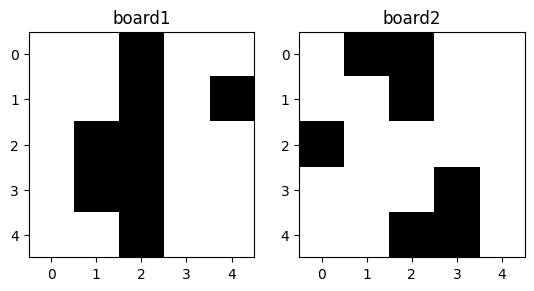

In [281]:
board1_to_show = to_show(board1,SIZE)
board2_to_show = to_show(board2,SIZE)
fig, axes = plt.subplots(1, 2)

# Plot the first image
axes[0].imshow(board1_to_show)
axes[0].set_title('board1')

# Plot the second image
axes[1].imshow(board2_to_show)
axes[1].set_title('board2')

# Show the images
plt.show()

In [282]:
new_columns = [f'Col_{i}' for i in range(1, 25 + 1)]
source = "decision_tree_df_model_pixel"
board1.columns = new_columns
res = pd.DataFrame()
for i in range(SIZE*SIZE): # to any pixel in the expected board
    name_file = f"{source}_{str(i+1)}.pkl"
    with open(name_file, 'rb') as file:
        loaded_model = pickle.load(file)
    pixel = loaded_model.predict(board1)
    res[i] = pixel

C:\Users\דרור\AppData\Local\Temp\ipykernel_25516\570581587.py:4: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  color = int(board[col]) * -1 + 1


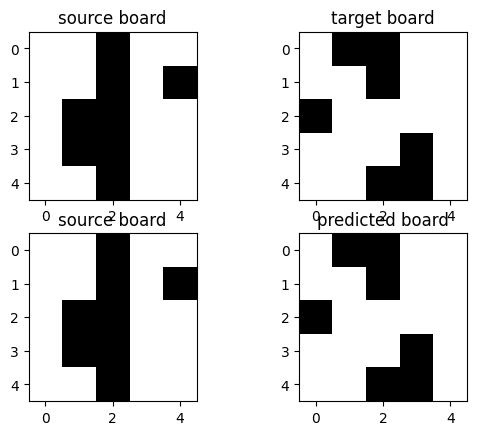

In [283]:
res_to_show = to_show(res,SIZE)
fig, axes = plt.subplots(2, 2)

axes[0, 0].imshow(board1_to_show)
axes[0, 0].set_title('source board')
axes[0, 1].imshow(board2_to_show)
axes[0, 1].set_title('target board')
axes[1, 0].imshow(board1_to_show)
axes[1, 0].set_title('source board')
axes[1, 1].imshow(res_to_show)
axes[1, 1].set_title('predicted board')

# Show the images
plt.show()

In [284]:
new_columns = [f'Col_{i}' for i in range(1, 25 + 1)]
board2.columns = new_columns
source = "decision_tree_reverse_df_model_pixel"
res = pd.DataFrame()
for i in range(SIZE*SIZE): # to any pixel in the expected board
    name_file = f"{source}_{str(i+1)}.pkl"
    with open(name_file, 'rb') as file:
        loaded_model = pickle.load(file)
    pixel = loaded_model.predict(board2)
    res[i] = pixel

C:\Users\דרור\AppData\Local\Temp\ipykernel_25516\570581587.py:4: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  color = int(board[col]) * -1 + 1


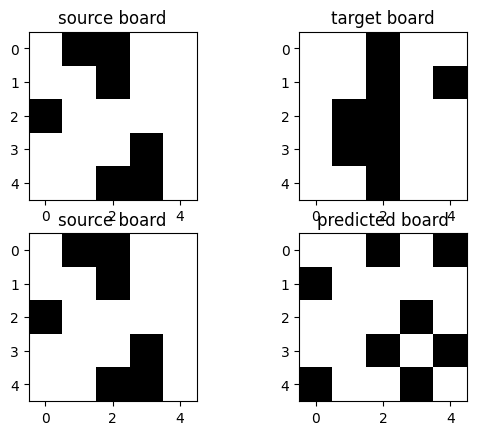

In [285]:
res_to_show = to_show(res,SIZE)
fig, axes = plt.subplots(2, 2)

axes[0, 0].imshow(board2_to_show)
axes[0, 0].set_title('source board')
axes[0, 1].imshow(board1_to_show)
axes[0, 1].set_title('target board')
axes[1, 0].imshow(board2_to_show)
axes[1, 0].set_title('source board')
axes[1, 1].imshow(res_to_show)
axes[1, 1].set_title('predicted board')

# Show the images
plt.show()